In [1]:
import pandas as pd
import numpy as np

# Read the dataset as a dataframe
df = pd.read_csv("gait_final.csv")
df = df.iloc[:, 2:]

# Split the dataframe into input and targets
inp = df.drop(['Variability'], axis=1)
target = df[['Variability']]

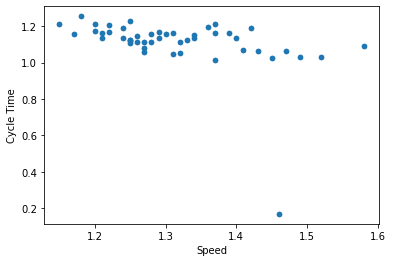

In [3]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='Speed', y='Cycle Time')
plt.show()

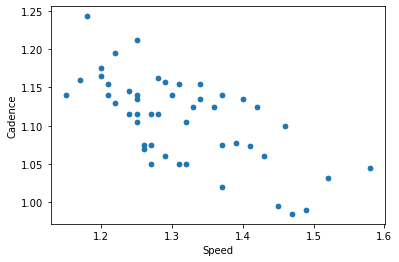

In [10]:
df.plot(kind='scatter', x='Speed', y='Cadence')
plt.show()

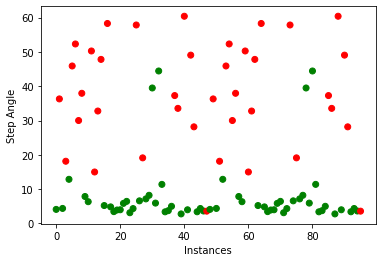

In [8]:
colors = {0: 'red', 1: 'green'}
plt.scatter(np.arange(len(df['Step Angle'])), df['Step Angle'], c=df['Variability'].map(colors))
plt.xlabel('Instances')
plt.ylabel('Step Angle')
plt.show()

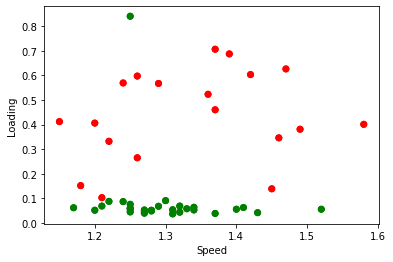

In [15]:
colors = {0: 'red', 1: 'green'}
plt.scatter(df['Speed'], df['Loading'], c=df['Variability'].map(colors))
plt.xlabel('Speed')
plt.ylabel('Loading')
plt.show()

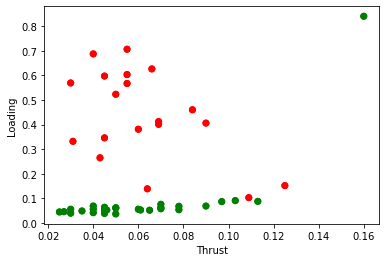

In [18]:
colors = {0: 'red', 1: 'green'}
plt.scatter(df['Thrust'], df['Loading'], c=df['Variability'].map(colors))
plt.xlabel('Thrust')
plt.ylabel('Loading')
plt.show()

In [40]:
# Convert pandas dataframe to numpy array
inp = inp.to_numpy()
target = target.to_numpy()

In [41]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(inp, target, test_size=0.2)

In [42]:
from sklearn import preprocessing

# Standardization of the input data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# Model 1
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

model1 = LogisticRegression(C=2.0).fit(X_train, y_train.ravel())

# Predictions
pred_model1 = model1.predict(X_test)

# Accuracy score of Model1
accuracy_1 = accuracy_score(y_test, pred_model1)
auc_1 = roc_auc_score(y_test, pred_model1)
fscore_1 = f1_score(y_test, pred_model1)

print("Accuracy of Model_1", accuracy_1)
print("AUC of Model_1", auc_1)
print("F1 score of Model_1", fscore_1)

Accuracy of Model_1 1.0
AUC of Model_1 1.0
F1 score of Model_1 1.0


In [61]:
# Model 2
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB().fit(X_train, y_train.ravel())

# Predictions
pred_model2 = model2.predict(X_test)

# Accuracy score of Model1
accuracy_2 = accuracy_score(y_test, pred_model2)
auc_2 = roc_auc_score(y_test, pred_model2)
fscore_2 = f1_score(y_test, pred_model2)

print("Accuracy of Model_1", accuracy_2)
print("AUC of Model_1", auc_2)
print("F1 score of Model_1", fscore_2)

Accuracy of Model_1 0.95
AUC of Model_1 0.9166666666666667
F1 score of Model_1 0.9655172413793104
